## Decision Tree - Exercises

This notebook contains exercises concerning decision trees.

In [1]:
import numpy as np

# attribute1: corner ({true, false})
# attribute2: blue ({true, false})
#

circle = 1
triangle = 2
rectangle = 3

A = np.array([  circle, circle, circle, circle, circle, circle,
                triangle, triangle, triangle,
                rectangle, rectangle, rectangle, rectangle, rectangle
                ])

B1 = np.array([ triangle, triangle, triangle,
                rectangle,rectangle,rectangle,rectangle,rectangle
                ])

B2 = np.array([circle, circle, circle, circle, circle, circle])

C1 =  np.array([ triangle, triangle, triangle,
                circle, circle
                ])

C2 = np.array([circle, circle, circle, circle,
                rectangle, rectangle, rectangle, rectangle, rectangle])

### Exercise 1 - Entropy:
Implement the entropy in python. Compare your implementation with your calculated values.

**Use the following stub for your implementation:**

```python
def entropy(Y: np.array):
    """ Compute the entropy of a given array of class-labels.
    
    Parameters
    ----------
    Y: np.array
        A one dimensional numpy array containing class labels. Class labels
        are assumed not to be one-hot encoded but categorical integer values.

    Returns
    ----------
    Entropy of Y.
    """
    pass
```

Handcalculated values. B is B1 and C is B2

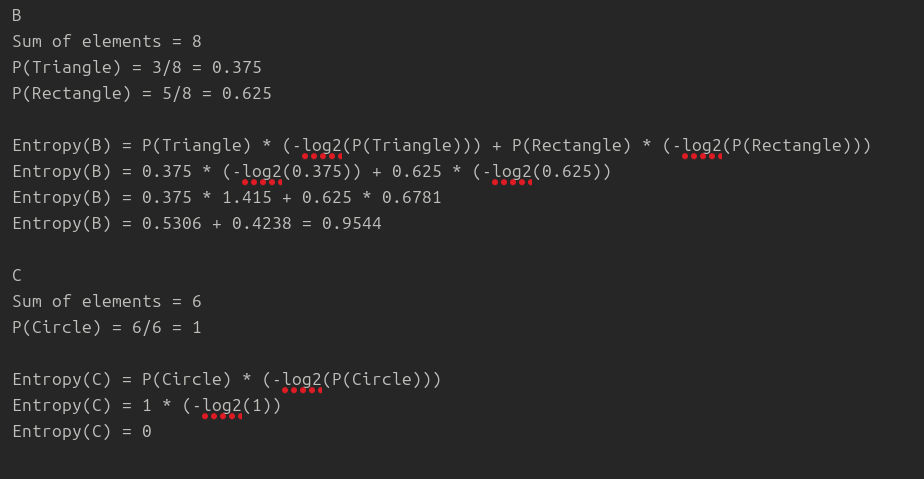

In [8]:
def entropy(Y: np.array):
    elements, counts = np.unique(Y, return_counts=True)
    probabilities = counts / len(Y)
    entropy = np.negative(np.sum(probabilities * np.log2(probabilities)))
    return entropy

In [13]:
entropyB1 = entropy(B1)
entropyB2 = entropy(B2)

print("Entropy of B: ", entropyB1)
print("Entropy of C: ", entropyB2)
print("This fits together with the hand-calculated values.")

Entropy of B:  0.954434002924965
Entropy of C:  -0.0
This fits together with the hand-calculated values.


### Exercise 2 - Information Gain:

Implement the conditional entropy and information gain. Compare your implementation with your calculated results.

**Use the following stubs for your implementation:**

```python
def conditional_entropy(Sa: list):
    """ Compute the conditional entropy.

    Compute the conditional entropy for a list of numpy arrays with given class labels. Each list entry
    is assumed to contain the class labels of a set of data that was created by splitting a training set
    of data according to an attribute.

    Parameters
    ----------
    Sa: [np.array]
        A list of one dimensional numpy arrays each containing class labels. Class labels
        are assumed not to be one-hot encoded but categorical integer values.

    Returns
    ----------
    Entropy of Y.
    """
    pass
```

```python
def information_gain(T : np.array, Sa : list):
    """ Compute the information gain.

    Parameters
    ----------
    T: np.array
        A one dimensional numpy array containing class labels. Class labels
        are assumed not to be one-hot encoded but categorical integer values.

    Sa: [np.array]
        A list of one dimensional numpy arrays each containing class labels. Class labels
        are assumed not to be one-hot encoded but categorial integer values.

    Returns
    ----------
    Bits saved when encoding Sa instaed of T.
    """
    pass
```



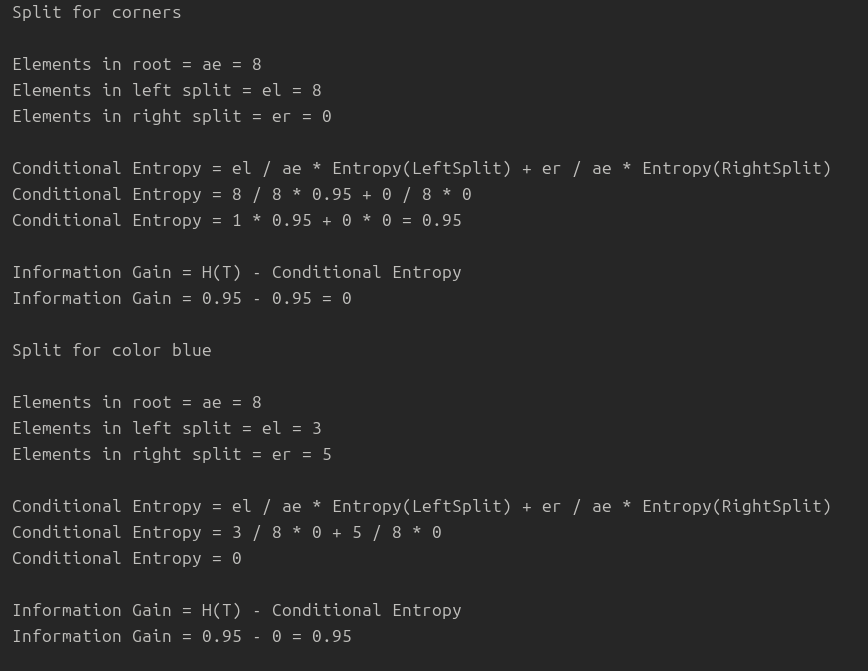

In [24]:
def conditional_entropy(Sa):
    all_elements = 0

    for arr in Sa:
      all_elements += len(arr)

    cond_entropy = 0
    for arr in Sa:
        entropyOfGroup = entropy(arr)
        cond_entropy += (len(arr) / all_elements) * entropyOfGroup

    return cond_entropy

def information_gain(T, Sa):
    entropyRoot = entropy(T)
    cond_entropy = conditional_entropy(Sa)
    return entropyRoot - cond_entropy

In [30]:
root = np.array([triangle, triangle, triangle, rectangle, rectangle, rectangle, rectangle, rectangle])
splitCorners = [np.array([triangle, triangle, triangle, rectangle, rectangle, rectangle, rectangle, rectangle]), np.array([])]
splitBlue = [np.array([triangle, triangle, triangle]), np.array([rectangle, rectangle, rectangle, rectangle, rectangle])]

print("Conditional Entropy of split corners: " , conditional_entropy(splitCorners))
print("Conditional Entropy of split blue color: " , conditional_entropy(splitBlue))
print("\nInfo gain of split corners: " , information_gain(root, splitCorners))
print("Info gain of split blue color: " , information_gain(root, splitBlue))

print("\nThat matches with the hand-calculated values for conditional-entropy and information-gain.")

Conditional Entropy of split corners:  0.954434002924965
Conditional Entropy of split blue color:  0.0

Info gain of split corners:  0.0
Info gain of split blue color:  0.954434002924965

That matches with the hand-calculated values for conditional-entropy and information-gain.


### Exercise 3 - Gini Impurity:

Implement the Gini Impurity and compare your results with your calculations.

**Use the following stubs for your implementation:**

```python
def gini_impurity(Y:np.array):
   """ Compute the gini impurity.

    Parameters
    ----------
    Y: np.array
        A one dimensional numpy array containing class labels. Class labels
        are assumed not to be one-hot encoded but categorical integer values.

    Returns
    ----------
    Gini impurity of the set with labels Y.
    """
    pass
```


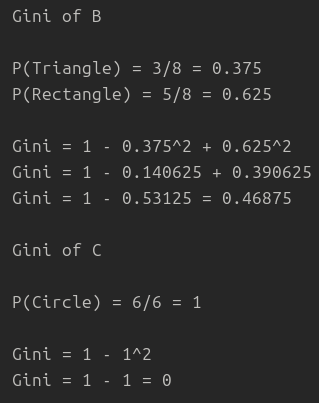

In [34]:
def gini_impurity(Y):
    elements, counts = np.unique(Y, return_counts=True)
    probabilities = counts / len(Y)
    return 1 - np.sum(probabilities ** 2)

In [36]:
print("Gini of B: ", gini_impurity(B1))
print("Gini of C: ", gini_impurity(B2))
print("That matches with the hand-calculated values.")

Gini of B:  0.46875
Gini of C:  0.0
That matches with the hand-calculated values.


### Exercise 4 - Decision Tree in scikit-learn:

Let's now use a full implementation of decision trees from scikit-learn.

* Build a decision tree using **gini impurity** and a decision tree using **entropy** based on the implementation in sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
* Interpret and compare the results by using the ```plot_tree()``` method.

In [37]:
from sklearn import tree
Y = np.array([  circle, circle, circle, circle, circle, circle,
                triangle, triangle, triangle,
                rectangle, rectangle, rectangle, rectangle, rectangle
            ])

# Attributes (aka Features)
# x1 = corners, x2 = blue
# Notice that sklearn does not support categorical attributes we therefore encode this
# (one-hot-encoded) by using 0 as False and 1 as True.
#
X = np.array([[0, 1],  # circle 1
              [0, 1],  # circle 2
              [0, 0], # circle 3
              [0, 0], # circle 4
              [0, 0], # circle 5
              [0, 0], # circle 6
              [1, 1],   # triangle 1
              [1, 1],   # triangle 2
              [1, 1],   # triangle 3
              [1, 0],  # rectangle 1
              [1, 0],  # rectangle 2
              [1, 0],  # rectangle 3
              [1, 0],  # rectangle 4
              [1, 0]   # rectangle 5
            ])

In [43]:
clfGini = tree.DecisionTreeClassifier(criterion='gini')
clfGini = clfGini.fit(X, Y)

clfEntropy = tree.DecisionTreeClassifier(criterion='entropy')
clfEntropy = clfEntropy.fit(X,Y)

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\ngini = 0.643\nsamples = 14\nvalue = [6, 3, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [0, 3, 5]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]')]

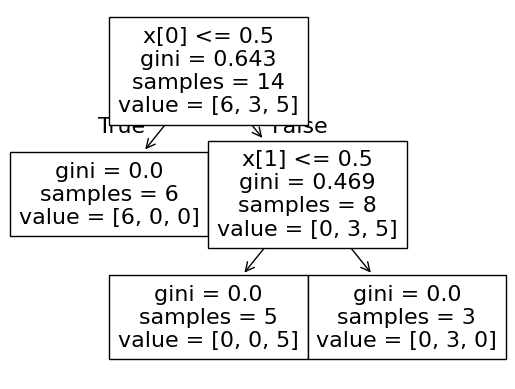

In [44]:
tree.plot_tree(clfGini)

[Text(0.4, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 3, 5]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [0, 3, 5]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]')]

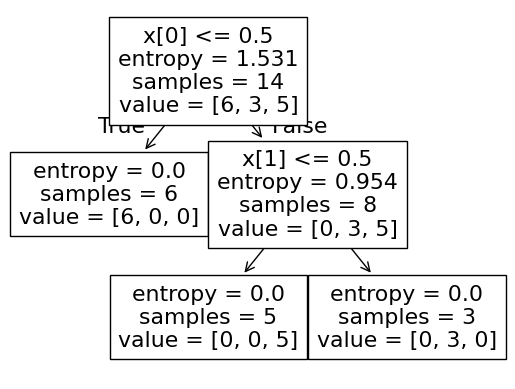

In [45]:
tree.plot_tree(clfEntropy)

In [47]:
print("The trees for entropy and for gini-impurity split the elemnts exactly the same way here. It first splitted for corners, completely seperating all circles then splitting for blue-color (all triangles are blue and no rectangle is blue)")

The trees for entropy and for gini-impurity split the elemnts exactly the same way here. It first splitted for corners, completely seperating all circles then splitting for blue-color (all triangles are blue and no rectangle is blue)


### Exercise 5 - Experiment with Decision Trees in scikit-learn:

In this exercise it is your job to experiment with the decision tree implementation of sklearn. I provided you with a ```gen_data()``` method
which is capable of generating (random) data. Use the ```accuracy_score()``` method from sklearn.metrics for evaluation. Train a classifier for this synthetic data and try to answer the following questions:

* How does the accuracy change depending on the number of data?
* Create a seperate dataset for training and testing, what is the difference between training and test accuracy? Why is it different?
* Restrict the depth of the decision tree, what changes?
* Have a closer look on the decisions in a tree. Explain the results. (Note: You can increase the size of the plotted tree using this line of code ```plt.figure(figsize=(20,20))``` before calling the ```tree.plot_tree``` method)

In [68]:
import matplotlib.pyplot as plt

def gen_data(num_samples=10):

    std = 10
    mean = 0

    X = std * np.random.uniform(0, 1, (num_samples, 2)) + mean
    Y = np.zeros(num_samples)
    Y[0:int(num_samples/2)] = 1

    #plt.figure()
    #plt.scatter(X[0:int(num_samples/2),0], X[0:int(num_samples/2),1])
    #plt.scatter(X[int(num_samples/2):-1,0], X[int(num_samples/2):-1,1])
    #plt.legend(['Class-1', 'Class-2'])
    return X,Y

In [69]:
from sklearn.metrics import accuracy_score

data = gen_data()
X = data[0]
Y = data[1]

In [97]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)
pred = clf.predict(X)

print("Accuracy for default (10) samples: ", accuracy_score(Y, pred))

Accuracy for default (10) samples:  1.0


In [72]:
dataSizes = np.array([2,5,7,12,15,25,50,100,1000])

scores = []

for dataSize in dataSizes:
  data = gen_data(num_samples=dataSize)
  X = data[0]
  Y = data[1]

  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X,Y)
  pred = clf.predict(X)
  scores.append(accuracy_score(Y, pred))

print(scores)
print("No matter what size, the tree always has got a 100% accuracy if you test with the same data that you trained with. Basically we are just overfitting on the data")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
No matter what size, the tree always has got a 100% accuracy if you test with the same data that you trained with. Basically we are just overfitting on the data


In [96]:
trainData = gen_data()
testData = gen_data()

X_train = trainData[0]
Y_train = trainData[1]
X_test = testData[0]
Y_test = testData[1]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Accuracy on train-data: ", accuracy_score(Y_train, pred_train))
print("Accuracy on test-data: ", accuracy_score(Y_test, pred_test))

print("The accuracy for the train set is again 100% and the accuracy for the test-data is way less.")
print("The tree basically learned every train-data by heart (overfitting) and is not able to detect features to split the tree in such a way that it is a good general way. \nWe are basically just guessing (Our data is generated quite randomly)")

Accuracy on train-data:  1.0
Accuracy on test-data:  0.3
The accuracy for the train set is again 100% and the accuracy for the test-data is way less.
The tree basically learned every train-data by heart (overfitting) and is not able to detect features to split the tree in such a way that it is a good general way. 
We are basically just guessing (Our data is generated quite randomly)


In [130]:
data = gen_data(num_samples=100)
X = data[0]
Y = data[1]

clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X,Y)
pred = clf.predict(X)

print("Accuracy for 100 samples and restricted depth (2): ", accuracy_score(Y, pred))
print("The tree is not able to overfit on the data to much. So we will lose some accuracy.")

Accuracy for 100 samples and restricted depth (5):  0.63
The tree is not able to overfit on the data to much. So we will lose some accuracy.


[Text(0.5, 0.8333333333333334, 'x[0] <= 3.69\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.25, 0.5, 'x[1] <= 8.836\ngini = 0.444\nsamples = 30\nvalue = [10, 20]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.473\nsamples = 26\nvalue = [10, 16]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.5, 'x[0] <= 6.68\ngini = 0.49\nsamples = 70\nvalue = [40, 30]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.422\nsamples = 33\nvalue = [23, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.497\nsamples = 37\nvalue = [17, 20]')]

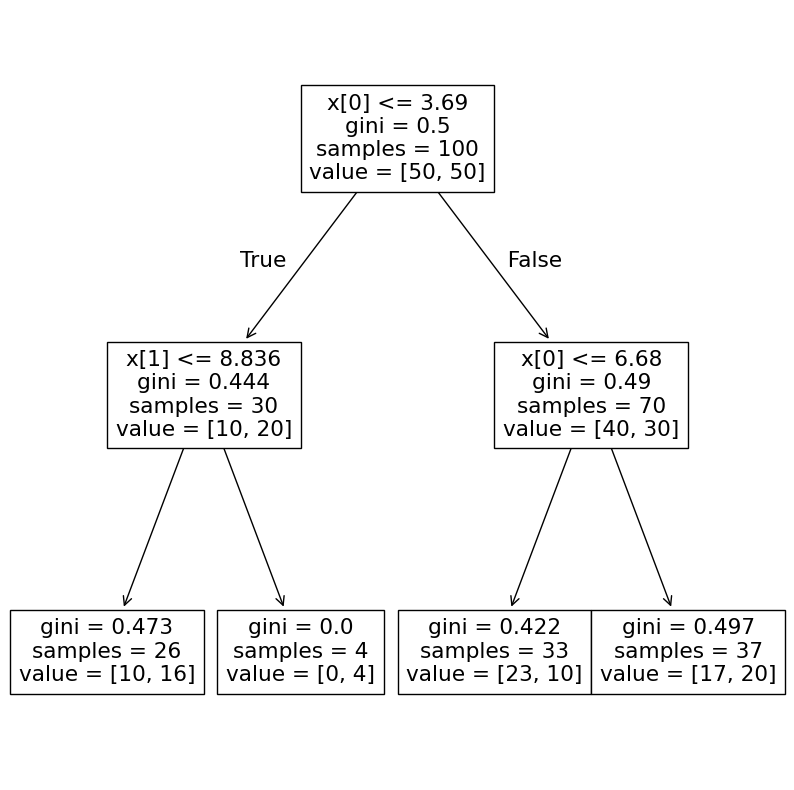

In [133]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)

You can see that the first split happens on the first attribute of the data. The threshold is at 3.69. on the left side (when the value is smaller than 3.69) the next split happens on the second attribute at the threshold of 8.836.
For the right side, the split happens on the first attribute again at 6.68.

Here you can see that a decision tree can be interpreted and is not a black box model.


### Exercise 6 - Condition monitoring of hydraulic systems sata set

Source: https://archive.ics.uci.edu/ml/datasets/Condition+monitoring+of+hydraulic+systems

* Load the dataset and use a DecisionTree to classify it.
* Make sure you are using a test- and train-split.
* Try to predict the different type of faults using decision trees.
* Explain what attributes the trees select.


#### Data Set Information:

The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank [1], [2]. The system cyclically repeats constant load cycles (duration 60 seconds) and measures process values such as pressures, volume flows and temperatures while the condition of four hydraulic components (cooler, valve, pump and accumulator) is quantitatively varied.


#### Attribute Information:

The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank [1], [2]. The system cyclically repeats constant load cycles (duration 60 seconds) and measures process values such as pressures, volume flows and temperatures while the condition of four hydraulic components (cooler, valve, pump and accumulator) is quantitatively varied.

**Attributes are:**
```
Attribute   Sensor	    Physical quantity		        Unit	    Sampling rate
X[0]           PS1		Pressure			bar		100 Hz
X[1]           PS2		Pressure			bar		100 Hz
X[2]           PS3		Pressure			bar		100 Hz
X[3]           PS4		Pressure			bar		100 Hz
X[4]           PS5		Pressure			bar		100 Hz
X[5]           PS6		Pressure			bar		100 Hz
X[6]           EPS1             Motor power			W		100 Hz
X[7]           FS1		Volume flow			l/min		10 Hz
X[8]           FS2		Volume flow			l/min		10 Hz
X[9]           TS1		Temperature			Â°C		1 Hz
X[10]          TS2		Temperature			Â°C		1 Hz
X[11]          TS3		Temperature			Â°C		1 Hz
X[12]          TS4		Temperature			Â°C		1 Hz
X[13]          VS1		Vibration			mm/s		1 Hz
X[14]          CE		Cooling efficiency (virtual)	%		1 Hz
X[15]          CP		Cooling power (virtual)		kW		1 Hz
X[16]          SE		Efficiency factor		%		1 Hz
```

The target conditions are:

**1: Cooler condition / %:***
* 3: close to total failure
* 20: reduced effifiency
* 100: full efficiency

**2: Valve condition / %:**
* 100: optimal switching behavior
* 90: small lag
* 80: severe lag
* 73: close to total failure

**3: Internal pump leakage:**
* 0: no leakage
* 1: weak leakage
* 2: severe leakage

**4: Hydraulic accumulator / bar:**
* 130: optimal pressure
* 115: slightly reduced pressure
* 100: severely reduced pressure
* 90: close to total failure

    

In [134]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/condition_monitoring.pickle -P ../data

import pickle
import numpy as  np
from dataclasses import dataclass

@dataclass
class Dataset:
    Description: str
    Attributes: list()
    Targets_cooler: list()
    Targets_valve: list()
    Targets_leakage: list()
    Targets_accu: list()
    X: np.array
    Y_cooler: np.array
    Y_valve: np.array
    Y_leakage: np.array
    Y_accu: np.array

def load_dataset(filename):
    with open(filename, 'rb') as fd:
        dataset = pickle.load(fd)
    return dataset

data = load_dataset('../data/condition_monitoring.pickle')

--2024-11-30 20:35:51--  https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/condition_monitoring.pickle
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/condition_monitoring.pickle [following]
--2024-11-30 20:35:51--  https://raw.githubusercontent.com/shegenbart/Jupyter-Exercises/main/data/condition_monitoring.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 371916 (363K) [application/octet-stream]
Saving to: ‘../data/condition_monitoring.pickle’

condition_monitorin 100%[===================>] 363.20K  --.-KB/s    in 0.05s   

2024-11-30 20:

In [150]:
from sklearn.model_selection import train_test_split

In [227]:
def build_decision_tree(X, Y, test_size=0.33, random_state=42, max_depth=None, min_sampled_leaf=1):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
  clf = tree.DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_sampled_leaf)
  clf = clf.fit(X_train,Y_train)
  pred = clf.predict(X_test)
  acc = accuracy_score(Y_test, pred)
  tree.plot_tree(clf)
  print("Achieved an accuracy of: ", acc)

Achieved an accuracy of:  0.9986263736263736


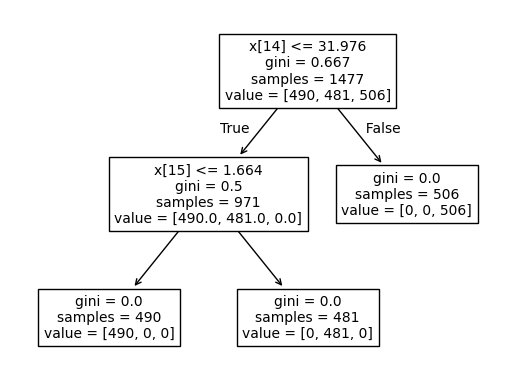

In [186]:
# Decision tree for cooler
build_decision_tree(data.X, data.Y_cooler, random_state=1)

You can see that the tree first uses the cooling efficiency (attribute 14) and then the cooling power (attribute 15) to seperate the sampled in its three different states of cooler condition. Tested with different random-states on the train-test-split and always had a high accuracy.

Achieved an accuracy of:  0.9244505494505495


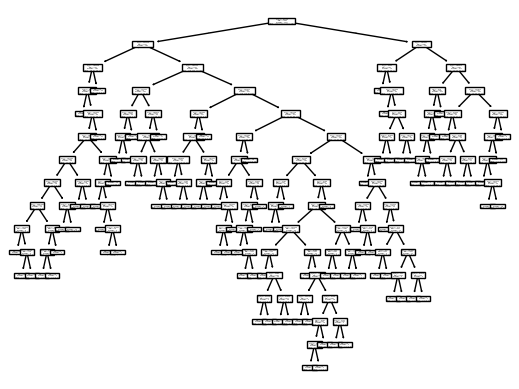

In [229]:
# Decision tree for Valve
build_decision_tree(data.X, data.Y_valve,random_state=8)

For the prediction of the valve-condition, the decision tree without depth restriction build a much larger tree on its own. The accuracy for different train-test-splits with an accuracy of about 90% is still pretty high. Lets try restricting the depth of this decision tree a little more.

Achieved an accuracy of:  0.5521978021978022


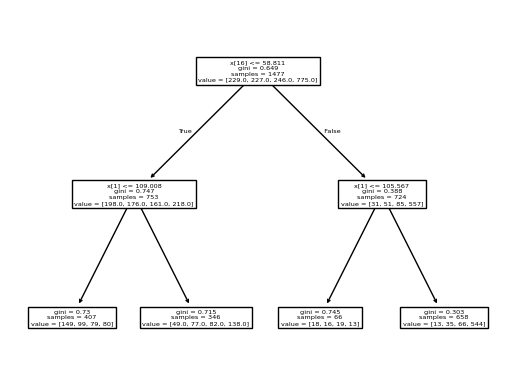

In [228]:
# Decision tree for Valve - with restriction
build_decision_tree(data.X, data.Y_valve, random_state=1, max_depth=2)

Restricting the depth here is lowering the accuracy quite a bit, especially if the depth is lowered to a very low amount. Depth of 1 or 2 for example is only able to achieve a accuracy of about 50-55%. It looks like the attributes 16 (efficiency factor) and 1 (pressure) are the most important feature to look at when trying to predict the status of the valve.

Achieved an accuracy of:  0.9835164835164835


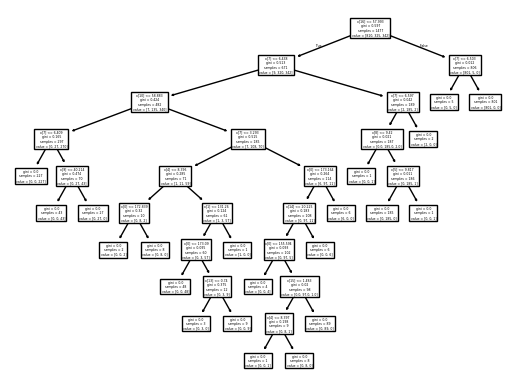

In [233]:
# Decision tree for leakage
build_decision_tree(data.X, data.Y_leakage, random_state=7)

The decision tree for leakages are also quite accurate when predicting leakages for test-data with around 98%. The tree also doesn't get as big as the tree for the valve if you don't restrict its depth.

Achieved an accuracy of:  0.9821428571428571


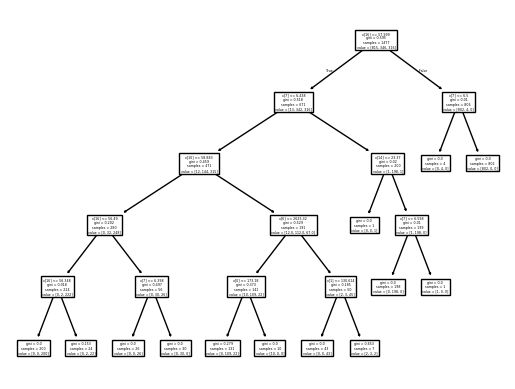

In [251]:
# Decision tree for leakage - depth restriction
build_decision_tree(data.X, data.Y_leakage, random_state=2, max_depth=5)

If you restrict the depth of the tree to 5 it is still pretty good at making prediction about the leakage, which could actually lead to a better general prediction basis for the model. Here also the efficiency feature is the most important. And also the volume flow is looked at when predicting for leakages.

Achieved an accuracy of:  0.9368131868131868


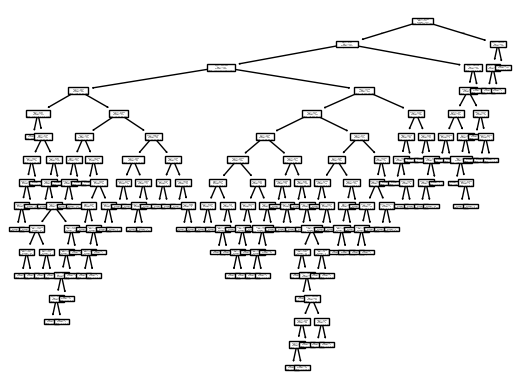

In [252]:
# Decision tree for accu
build_decision_tree(data.X, data.Y_accu, random_state=12)

The unrestricted tree for the hydraulic accumulator fault can achieve a average accuracy of about 93%.

Achieved an accuracy of:  0.6510989010989011


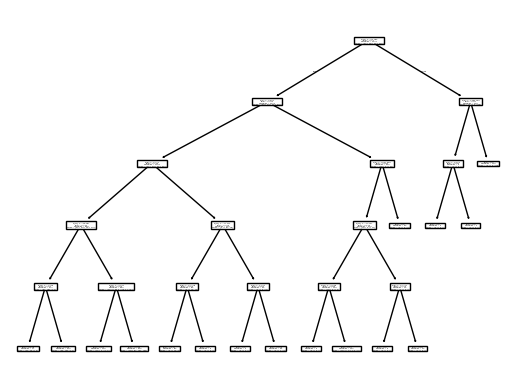

In [262]:
# Decision tree for accu - restricted depth
build_decision_tree(data.X, data.Y_accu, random_state=74, max_depth=5)

Here lowering the max-depth to 5 leads to quite a worse model performance with an average accuracy of about 65-75%. Here the efficiency (attribute 16) is also the most important when predicting for failure. Also the pressure is looked at.